Data Sources:

CDC:
 2017-2019 (National Survey of Family Growth)
https://www.cdc.gov/nchs/data/nsfg/2017-2019_NSFG_FemResp_SectionE_Codebook-508.pdf
WebCode has been discontinued as of 2020 :( SO had to go through raw data manually.
#Contraception Data
https://www.cdc.gov/nchs/data/databriefs/db388-tables-508.pdf#page=2

#IUD failure rate data
https://www.ohsu.edu/sites/default/files/2020-01/Comparison%20between%20two%2052mg%20levonorgestrel-releasing%20intrauterine%20systems%20Liletta%20and%20Mirena.pdf

https://www.fsrh.org/documents/fsrh-ceu-new-product-review-kyleena-january-2018/


An unintended pregnancy is one that
occurred when a woman wanted to
become pregnant in the future but
not at the time she became pregnant
(“wanted later”) or one that occurred
when she did not want to become pregnant then or at any time in the future
(“unwanted”). In this fact sheet, births
resulting from unintended pregnancies
are referred to as “unplanned.” - Guttmacher Institute

In [33]:
## Female Respondent File Codebook - made csv of relevant data
##import csv file info

import requests
import pandas as pd

df = pd.read_csv('NSFG.csv')
df.columns = [c.lower().replace(' ', '_') for c in df.columns]

df.rename(columns = {'birth_control_methods':'method','percent(%)':'percent','across_population_(females_15-49)':"num_in_pop",'estimated_unintended_pregnancies_':'est_unplnd_prg','planned_pregnancies':'plnd_prg'}, inplace=True)
#wanted to make each pregnancy I extrapolated that of a whole person but could intially not do int(x) for the string of 'NaN' 
#learned apply function on StackedOverflow
#Source: https://stackoverflow.com/questions/44061607/pandas-lambda-function-with-nan-support
df['est_unplnd_prg']=df['est_unplnd_prg'].apply(lambda x : int(x) if pd.notna(x) else x)


,percent,num_in_pop,failure_rate,est_unplnd_prg,plnd_prg
count,12.000000,1.200000e+01,10.000000,1.100000e+01,1.0
mean,16.666667,1.211667e+07,0.137650,6.561377e+05,1608215.0
std,27.911364,2.029156e+07,0.261070,1.104939e+06,NaN
min,1.700000,1.235900e+06,0.001000,1.454000e+03,1608215.0
25%,3.175000,2.308225e+06,0.002375,1.032300e+04,1608215.0
50%,5.750000,4.180250e+06,0.019000,1.853850e+05,1608215.0
75%,15.025000,1.092318e+07,0.145000,6.659320e+05,1608215.0
max,100.000000,7.270000e+07,0.850000,3.608758e+06,1608215.0


<Figure size 640x480 with 0 Axes>

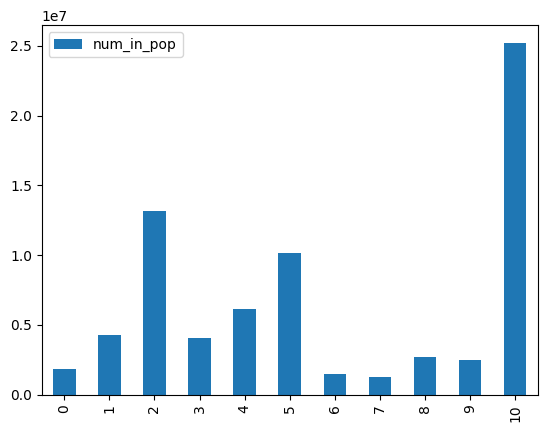

In [34]:
import matplotlib
from matplotlib import pyplot as plt    
import numpy as np

fig1 = plt.figure()
df


#First Map: Bar chart of population on contraception by method
df[['num_in_pop']].iloc[:-1].plot(kind='bar')
df.describe()


In [35]:
#Second Graph: Not on contraception - bar graph of population next to stack of unplanned vs planned pregnancies
##dfsum=df

#dfsum.loc[0] += dfsum.loc[1]
#dfsum.set_index('method',inplace=True)
#dfsum.iloc[1]['method'] ='IUD'
#dfsum.drop(1,inplace=True)

#dfsum.set_index('method')[['est_unplnd_prg']].iloc[:1].plot(kind='bar')
#could not get this to work in the end RIP
#Third Graph: Total expected pregnancies based off NSFG survey compared to 2018 Birth rate, miscarriage rate, abortion rate - show gap can be attributed to undercounting of abortions as most states do not report to CDC (get stat on this)

In [36]:
#needed to rename my terrible csv files
df1 = pd.read_csv("IUD_type_per_1000.csv")
df1.rename(columns = {'IUD':'iud_type','Year 1':'y1','Year 3 (cumulative)':'y3','Year 5 (cumulative)':'y5','Year 8 (cumulative)':'y8','Year 10 (cumulative':'y10'}, inplace=True)
#df1['per 1000 women']= df['y']

df1


,iud_type,y1,y3,y5,y8,y10
0,Copper,6.0,8.0,14.0,NaN,22.0
1,Mirena,2.0,1.0,7.0,6.8,NaN
2,Skyla,4.0,9.0,NaN,NaN,NaN
3,Liletta,5.0,NaN,10.0,NaN,NaN
4,Kyleena,1.6,NaN,14.0,NaN,NaN


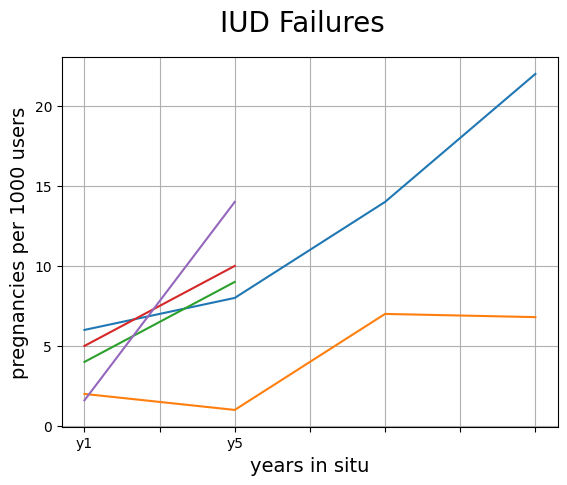

In [37]:
#Fourth Graph: Show amount of IUD failures based of varying efficacy of different brands
#Show that efficacy over longer periods of time decreases

fig = plt.figure()

#I wanted to graph but ran into trouble with 'NaN values so used the dropna() function (googled it because I figured there was opposite to isna) to ignore them and the transpose to do each column as a line instead of each row
for c in df1['iud_type']:
    df1.set_index('iud_type').transpose()[c].dropna().plot()

plt.suptitle('IUD Failures', fontsize=20)
plt.xlabel('years in situ', fontsize=14)
plt.ylabel('pregnancies per 1000 users', fontsize=14)

plt.grid()
plt.tick_params()

